# Text Classification Machine Learning (ML)

## Feuerwehreinsätze SW

Es wird aus dem Kurzbericht der Einsatztyp vorhergesagt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from lazypredict.Supervised import LazyClassifier
from sklearn.pipeline import Pipeline
import warnings

from text_classification_ml import *

warnings.filterwarnings("ignore")

### Daten vorbereiten für machine learning

In [2]:
# Liste mit Klassen die verwendet werden sollen
classes = ["Technische Hilfe", "Brand"]

df_reduced, df_rest = prepare_data_ml(classes)

In [3]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_reduced["Kurzbericht"], df_reduced["Einsatztyp"], 
    test_size=0.3, random_state=28)

# y_train, y_test to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

### PCA - Daten visualisieren

In [4]:
# Manuelles preprocessing für PCA
X_train_tfidf, X_test_tfidf, count_vect, tfidf_transformer = ml_preprocessing_manually(X_train, X_test)

# X_train_tfidf mit PCA reduzieren
pca = PCA(n_components=2)
X_train_tfidf_pca = pca.fit_transform(X_train_tfidf)

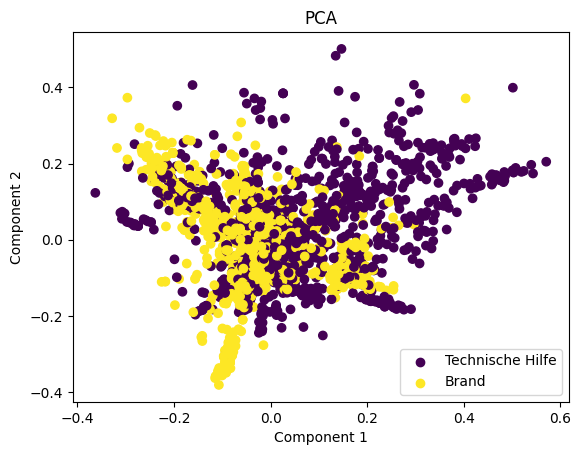

In [5]:
# Plot die PCA reduzierten Daten und y_train als Farbe, mit Titel und Labels und welches Label welcher Farbe entspricht
plt.scatter(X_train_tfidf_pca[:, 0], X_train_tfidf_pca[:, 1], c=y_train, cmap=plt.cm.viridis)
plt.title("PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# Plot Legend mit gleichen Farben wie im Plot und Labels
plt.legend(handles=[plt.scatter([], [], c=np.array([plt.cm.viridis(0)]), label=classes[0]), 
                    plt.scatter([], [], c=np.array([plt.cm.viridis(np.linspace(0, 1, len(classes)))[-1]]), label=classes[1])])
plt.savefig("./Plots/pca.png")

Die zwei Klassen sind zu erkennen, aber sie überlappen sich, in dieser 2D Darstellung, stark.

### Manuelle Pipline

In [6]:
# Manuelle Pipeline, ein MultinomialNB Classifier
X_train_tfidf, X_test_tfidf, count_vect, tfidf_transformer = ml_preprocessing_manually(X_train, X_test)

# Train classifier
clf = MultinomialNB().fit(X_train_tfidf, y_train)
predicted = clf.predict(X_test_tfidf)

# Print accuracy
print(metrics.classification_report(y_test, predicted, target_names=classes))

# Manuelle Testdaten
test_data = ["Auslaufende Betriebsstoffe", "Brand in einem Wohnhaus"]
predicted = clf.predict(tfidf_transformer.transform(count_vect.transform(test_data)))

# Print prediction als name aus classes
for doc, category in zip(test_data, predicted):
    print('%r => %s' % (doc, classes[category]))

                  precision    recall  f1-score   support

Technische Hilfe       0.95      0.94      0.95       565
           Brand       0.94      0.95      0.95       565

        accuracy                           0.95      1130
       macro avg       0.95      0.95      0.95      1130
    weighted avg       0.95      0.95      0.95      1130

'Auslaufende Betriebsstoffe' => Technische Hilfe
'Brand in einem Wohnhaus' => Brand


- Genauigkeit 95%
- Extrem gut

### Besten Classifier finden

In [17]:
X_train_tfidf, X_test_tfidf, count_vect, tfidf_transformer = ml_preprocessing_manually(X_train, X_test)

classifier = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
models, predictions = classifier.fit(X_train_tfidf, X_test_tfidf, y_train, y_test)
models

100%|██████████| 29/29 [04:38<00:00,  9.59s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
PassiveAggressiveClassifier,0.97,0.97,0.97,0.97,0.73
CalibratedClassifierCV,0.96,0.96,0.96,0.96,71.97
LinearSVC,0.96,0.96,0.96,0.96,12.24
LogisticRegression,0.96,0.96,0.96,0.96,1.25
LinearDiscriminantAnalysis,0.96,0.96,0.96,0.96,19.37
RidgeClassifierCV,0.96,0.96,0.96,0.96,23.22
RidgeClassifier,0.96,0.96,0.96,0.96,1.72
ExtraTreesClassifier,0.95,0.95,0.95,0.95,20.09
BernoulliNB,0.94,0.94,0.94,0.94,0.67


- PassiveAggressiveClassifier 97% Genauigkeit

### Automatische Pipline

In [7]:
text_clf = Pipeline([("vect", CountVectorizer()),
                     ("tfidf", TfidfTransformer()),
                     ("clf", PassiveAggressiveClassifier())])

In [8]:
text_clf.fit(X_train, y_train)
prediction = text_clf.predict(X_test)
print(metrics.classification_report(y_test, prediction, target_names=classes))

                  precision    recall  f1-score   support

Technische Hilfe       0.96      0.98      0.97       565
           Brand       0.98      0.96      0.97       565

        accuracy                           0.97      1130
       macro avg       0.97      0.97      0.97      1130
    weighted avg       0.97      0.97      0.97      1130



Deutlich kürzerer und einfacherer Code, im Vergleich zu manueller Pipline.

### Grid Search um die besten Hyperparameter zu finden

In [9]:
best_params = grid_search_text_clf(df_reduced["Kurzbericht"], df_reduced["Einsatztyp"])

Fitting 25 folds for each of 216 candidates, totalling 5400 fits
CV score: 0.97
Best parameters: {'clf__early_stopping': False, 'clf__loss': 'squared_hinge', 'clf__max_iter': 10000, 'clf__tol': 0.001, 'tfidf__norm': 'l2', 'vect__ngram_range': (1, 1)}


In [9]:
# Suche dauert ein wenig, daher hier die besten Parameter
best_params = {"vect__ngram_range": (1, 1),
               "tfidf__norm": "l2",
               "clf__max_iter": 10000,
               "clf__tol": 1e-3,
               "clf__early_stopping": False,
               "clf__loss": "squared_hinge"}

### Bester Classfier, automatische Pipline und besten Parameter

In [10]:
# Pipeline mit best_params
text_clf_best = Pipeline([("vect", CountVectorizer(ngram_range = best_params["vect__ngram_range"])),
                          ("tfidf", TfidfTransformer(norm = best_params["tfidf__norm"])),
                          ("clf", PassiveAggressiveClassifier(max_iter = best_params["clf__max_iter"],
                                                     tol = best_params["clf__tol"],
                                                     early_stopping = best_params["clf__early_stopping"],
                                                     loss = best_params["clf__loss"]))])

In [11]:
text_clf_best.fit(X_train, y_train)
prediction = text_clf_best.predict(X_test)
print(metrics.classification_report(y_test, prediction, target_names=classes))

                  precision    recall  f1-score   support

Technische Hilfe       0.96      0.98      0.97       565
           Brand       0.97      0.96      0.97       565

        accuracy                           0.97      1130
       macro avg       0.97      0.97      0.97      1130
    weighted avg       0.97      0.97      0.97      1130



- Genauigkeit von 97%
- Genau wie vor der Hyperparameteroptimierung
- Keine Verbesserung, Ergebnis war schon vorher sehr gut

In [12]:
# Predict for df_rest
predict_df_rest = text_clf_best.predict(df_rest["Kurzbericht"])
print(metrics.classification_report(df_rest["Einsatztyp"], predict_df_rest, target_names=classes))

                  precision    recall  f1-score   support

Technische Hilfe       1.00      0.98      0.99       645
           Brand       0.00      0.00      0.00         0

        accuracy                           0.98       645
       macro avg       0.50      0.49      0.49       645
    weighted avg       1.00      0.98      0.99       645



- In df_rest ist nur noch THL vorhanden

In [13]:
# Beispiel, Ausgabe als name aus classes für "Wohnung öffnen akut"
test_daten = ["Wohnung öffnen akut"]
prediction = text_clf_best.predict(test_daten)

# prediction als name
for doc, category in zip(test_daten, prediction):
    print('%r => %s' % (doc, classes[category]))

'Wohnung öffnen akut' => Technische Hilfe


Korrekte Klassifizierung